<a href="https://colab.research.google.com/github/gb08/Deep_learning_with_Colab/blob/master/predict_housing_prices_cal_housing_data_with_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Mount google drive

In [0]:
drive.mount('/content/gdrive')
#!ls gdrive/My\ Drive

model_path = '/content/gdrive/yourpath'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
%load_ext tensorboard

In [0]:
from sklearn.datasets import fetch_california_housing

**Download California Housing dataset**

In [0]:
fetch_california_housing = fetch_california_housing()

In [0]:
fetch_california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

Get input features and labels

In [0]:
X = fetch_california_housing.data
Y = fetch_california_housing.target

Split Training and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 )

Devide training set into training and validation set

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4)

In [0]:
X.shape, X_train.shape, X_val.shape, X_test.shape

((20640, 8), (9907, 8), (6605, 8), (4128, 8))

In [0]:
scaler = StandardScaler()

**Standerdize input features**

In [0]:
X_train_scaled = scaler.fit_transform(X_train)

In [0]:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [0]:
X_test_scaled.shape[1:]

(8,)

**Initialize Keras Sequential model with One hidden layer with "relu activation", Optimizer as SGD with learning rate of (1e-3) and loss fnc "mae" **

In [0]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape=(8,)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.SGD(1e-3), loss="mean_absolute_error")

Fit model on train set, Provide validation/holdout set. Store history object returned

In [0]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val), epochs=100,
                    callbacks=callbacks)

Train on 9907 samples, validate on 6605 samples
Epoch 1/100
9907/9907 [==============================] - 1s 68us/sample - loss: 1.5009 - val_loss: 1.1875
Epoch 2/100
9907/9907 [==============================] - 1s 54us/sample - loss: 0.9009 - val_loss: 0.8657
Epoch 3/100
9907/9907 [==============================] - 1s 54us/sample - loss: 0.7120 - val_loss: 0.7461
Epoch 4/100
9907/9907 [==============================] - 1s 59us/sample - loss: 0.6395 - val_loss: 0.6775
Epoch 5/100
9907/9907 [==============================] - 1s 54us/sample - loss: 0.5990 - val_loss: 0.6308
Epoch 6/100
9907/9907 [==============================] - 1s 56us/sample - loss: 0.5726 - val_loss: 0.5960
Epoch 7/100
9907/9907 [==============================] - 1s 61us/sample - loss: 0.5534 - val_loss: 0.5719
Epoch 8/100
9907/9907 [==============================] - 1s 55us/sample - loss: 0.5383 - val_loss: 0.5527
Epoch 9/100
9907/9907 [==============================] - 1s 60us/sample - loss: 0.5255 - val_loss: 0.537

In [0]:
model.evaluate(X_test_scaled, y_test)

4128/4128 [==============================] - 0s 23us/sample - loss: 0.4127


0.4127184997002284

In [0]:
model.predict(X_test_scaled)

array([[2.2893362],
       [3.2388365],
       [0.7518293],
       ...,
       [3.2417667],
       [1.2216382],
       [1.4829005]], dtype=float32)

Plot Learning curves

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

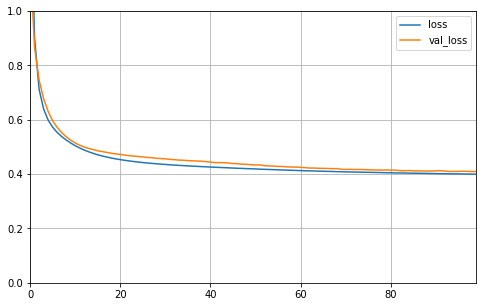

In [0]:
plot_learning_curves(history)

Check model Performance with different learning rates

In [0]:
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []

This is very basic method. Loop over learning rates. Compile and fit model for each. Store history for training details of each model

In [0]:
for learning_rate in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])

    optimizer = keras.optimizers.SGD(learning_rate)

    model.compile(loss="mean_squared_error", optimizer=optimizer)

    callbacks = [keras.callbacks.EarlyStopping(patience=10)]

    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_val_scaled, y_val), epochs=100,
                        callbacks=callbacks)
    histories.append(history)

Train on 9907 samples, validate on 6605 samples
Epoch 1/100
9907/9907 [==============================] - 1s 67us/sample - loss: 5.4455 - val_loss: 6.7445
Epoch 2/100
9907/9907 [==============================] - 1s 54us/sample - loss: 4.2195 - val_loss: 5.9144
Epoch 3/100
9907/9907 [==============================] - 1s 53us/sample - loss: 3.3420 - val_loss: 5.2748
Epoch 4/100
9907/9907 [==============================] - 1s 51us/sample - loss: 2.6954 - val_loss: 4.7752
Epoch 5/100
9907/9907 [==============================] - 1s 53us/sample - loss: 2.2117 - val_loss: 4.3463
Epoch 6/100
9907/9907 [==============================] - 1s 51us/sample - loss: 1.8460 - val_loss: 3.9570
Epoch 7/100
9907/9907 [==============================] - 1s 52us/sample - loss: 1.5661 - val_loss: 3.5911
Epoch 8/100
9907/9907 [==============================] - 1s 52us/sample - loss: 1.3516 - val_loss: 3.2455
Epoch 9/100
9907/9907 [==============================] - 1s 53us/sample - loss: 1.1861 - val_loss: 2.925

Plot Learning curves of each model

Learning rate: 0.0001


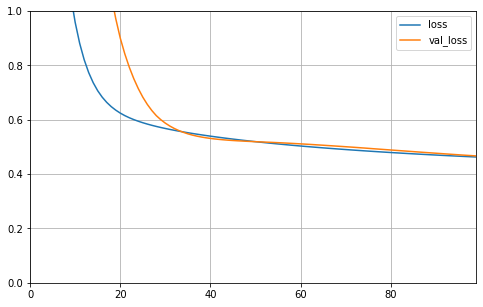

Learning rate: 0.0003


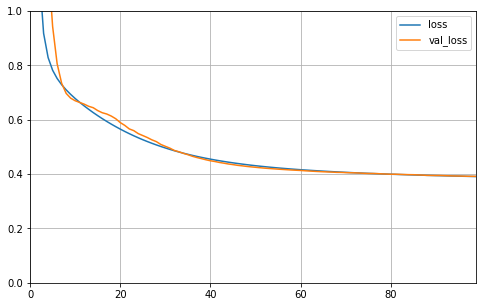

Learning rate: 0.001


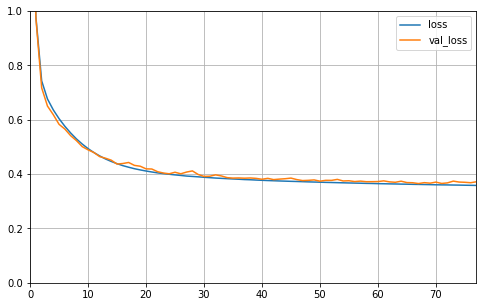

Learning rate: 0.003


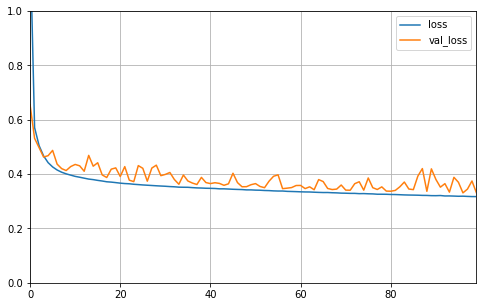

Learning rate: 0.01


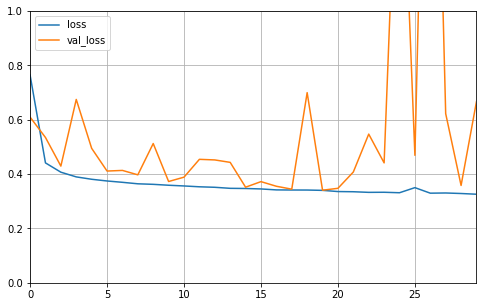

Learning rate: 0.03


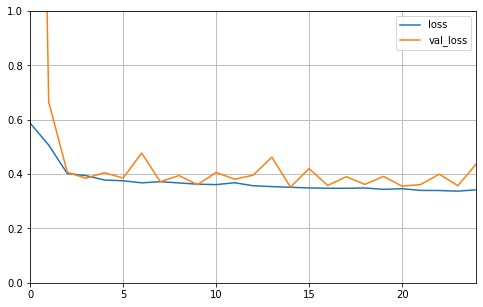

In [0]:
for learning_rate, history in zip(learning_rates, histories):
    print("Learning rate:", learning_rate)
    plot_learning_curves(history)

Slightly elegant way. Define function which will take set of hyperparameters, return compiled model

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):

    model = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="relu", input_shape=X_train.shape[1:]),
    ])

    for i in range(n_hidden):
      model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    # Last layer
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.SGD(learning_rate)

    model.compile(loss="mse", optimizer=optimizer)

    return model


Use sklearn wrapper

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Fit model with sklearns wrapper. Set callbacks and validation set

In [0]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=(X_val_scaled, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 9907 samples, validate on 6605 samples
Epoch 1/100
9907/9907 [==============================] - 1s 90us/sample - loss: 1.2426 - val_loss: 0.8138
Epoch 2/100
9907/9907 [==============================] - 1s 56us/sample - loss: 0.6043 - val_loss: 0.5867
Epoch 3/100
9907/9907 [==============================] - 1s 57us/sample - loss: 0.5131 - val_loss: 0.4790
Epoch 4/100
9907/9907 [==============================] - 1s 61us/sample - loss: 0.4629 - val_loss: 0.4464
Epoch 5/100
9907/9907 [==============================] - 1s 57us/sample - loss: 0.4364 - val_loss: 0.4215
Epoch 6/100
9907/9907 [==============================] - 1s 61us/sample - loss: 0.4156 - val_loss: 0.5186
Epoch 7/100
9907/9907 [==============================] - 1s 59us/sample - loss: 0.4045 - val_loss: 0.4150
Epoch 8/100
9907/9907 [==============================] - 1s 57us/sample - loss: 0.3936 - val_loss: 0.3950
Epoch 9/100
9907/9907 [==============================] - 1s 56us/sample - loss: 0.3843 - val_loss: 0.404

In [0]:
keras_reg.predict(X_test_scaled)

array([2.6166496 , 3.1056743 , 0.89100957, ..., 3.5470285 , 1.2265637 ,
       1.484509  ], dtype=float32)

Define set of hyperparameters to search

In [0]:
from scipy.stats import reciprocal

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(10, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

Use Skearns RandomizedsearchCV for hyperparameter tuning with 3 fold CV

In [0]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

Fit model

In [0]:
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_val_scaled, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0024851852868302353, n_hidden=1, n_neurons=51 ...
Train on 6604 samples, validate on 6605 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6604/6604 [==============================] - 1s 126us/sample - loss: 1.1982 - val_loss: 0.7157
Epoch 2/100
6604/6604 [==============================] - 0s 74us/sample - loss: 0.6605 - val_loss: 0.6204
Epoch 3/100
6604/6604 [==============================] - 0s 72us/sample - loss: 0.5815 - val_loss: 0.5654
Epoch 4/100
6604/6604 [==============================] - 0s 71us/sample - loss: 0.5253 - val_loss: 0.5139
Epoch 5/100
6604/6604 [==============================] - 0s 70us/sample - loss: 0.4844 - val_loss: 0.4858
Epoch 6/100
6604/6604 [==============================] - 0s 69us/sample - loss: 0.4547 - val_loss: 0.4898
Epoch 7/100
6604/6604 [==============================] - 0s 67us/sample - loss: 0.4342 - val_loss: 0.4913
Epoch 8/100
6604/6604 [==============================] - 0s 69us/sample - loss: 0.4195 - val_loss: 0.4788
Epoch 9/100
6604/6604 [==============================] - 0s 67us/sample - loss: 0.4077 - val_loss: 0.4755
Epoch 10/100
6604/6604 [==============================] -

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


6605/6605 [==============================] - 1s 138us/sample - loss: 1.9335 - val_loss: 2.0503
Epoch 2/100
6605/6605 [==============================] - 0s 73us/sample - loss: 0.6779 - val_loss: 0.6271
Epoch 3/100
6605/6605 [==============================] - 0s 69us/sample - loss: 0.5634 - val_loss: 0.5264
Epoch 4/100
6605/6605 [==============================] - 0s 73us/sample - loss: 0.5032 - val_loss: 0.4881
Epoch 5/100
6605/6605 [==============================] - 0s 67us/sample - loss: 0.4653 - val_loss: 0.4397
Epoch 6/100
6605/6605 [==============================] - 0s 70us/sample - loss: 0.4400 - val_loss: 0.4208
Epoch 7/100
6605/6605 [==============================] - 0s 66us/sample - loss: 0.4221 - val_loss: 0.4187
Epoch 8/100
6605/6605 [==============================] - 0s 73us/sample - loss: 0.4084 - val_loss: 0.4221
Epoch 9/100
6605/6605 [==============================] - 0s 71us/sample - loss: 0.3978 - val_loss: 0.4399
Epoch 10/100
6605/6605 [==============================] -

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.7min finished


Train on 9907 samples, validate on 6605 samples
Epoch 1/100
9907/9907 [==============================] - 3s 270us/sample - loss: 0.5591 - val_loss: 0.4376
Epoch 2/100
9907/9907 [==============================] - 1s 80us/sample - loss: 0.3864 - val_loss: 2.2227
Epoch 3/100
9907/9907 [==============================] - 1s 79us/sample - loss: 0.3664 - val_loss: 0.6718
Epoch 4/100
9907/9907 [==============================] - 1s 81us/sample - loss: 0.3409 - val_loss: 0.3478
Epoch 5/100
9907/9907 [==============================] - 1s 80us/sample - loss: 0.3344 - val_loss: 0.3538
Epoch 6/100
9907/9907 [==============================] - 1s 75us/sample - loss: 0.3288 - val_loss: 0.3558
Epoch 7/100
9907/9907 [==============================] - 1s 77us/sample - loss: 0.3242 - val_loss: 0.4187
Epoch 8/100
9907/9907 [==============================] - 1s 81us/sample - loss: 0.3211 - val_loss: 0.3320
Epoch 9/100
9907/9907 [==============================] - 1s 77us/sample - loss: 0.3138 - val_loss: 0.32

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f26c7ae0128>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f26c7a4c5c0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([10, 11, 12, 13, 14, 15, 16,...18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False

Best hyperparameters

In [0]:
rnd_search_cv.best_params_

{'learning_rate': 0.01543734951823562, 'n_hidden': 2, 'n_neurons': 89}

Best score with best parameters

In [0]:
rnd_search_cv.best_score_

-0.2998488925873445

Best Model

In [0]:

rnd_search_cv.best_estimator_

Evaluate best fit model

In [0]:
rnd_search_cv.score(X_test_scaled, y_test)

4128/4128 [==============================] - 0s 40us/sample - loss: 0.4248


-0.4247736125722412

Evaluate best Fit Model

In [0]:
model = rnd_search_cv.best_estimator_.model

model.evaluate(X_test_scaled, y_test)

4128/4128 [==============================] - 0s 35us/sample - loss: 0.4248


0.4247736125722412

Save model to G drive

In [0]:
model.save("cal_housing_reg_model.h5")